# ARIMA becslés

Ehhez az R-ben ismeretes auto-arima függvény implementálációját használjuk Pythonban.

In [ ]:
!pip install pmdarima

Szükséges könyvtárak importálása

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

Adatok beolvasása githubról, ha nincs access, akkor a 8. nap/Adatok-ban található a teszt fájl.

In [29]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-11-24 11:24:27--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358914 (351K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv.2’

time_series_covid19 100%[===================>] 350.50K  --.-KB/s    in 0.04s   

2020-11-24 11:24:27 (8.59 MB/s) - ‘time_series_covid19_confirmed_global.csv.2’ saved [358914/358914]



Pandas könyvtár segítségével az adatokat beolvassuk.

In [ ]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706,44988
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634


Kiválogatjuk a Magyarországhoz tartozó adatokat.

In [ ]:
df_hu = df.loc[df["Country/Region"] == "Hungary"]

In [ ]:
df_hu.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
142,NaN,Hungary,47.1625,19.5033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41732,43025,44816,46290,47768,48757,50180,52212,54278,56098,59247,61563,63642,65933,68127,71413,75321,79199,82780,86769,90988,94916,99625,104943,109616,114778,118918,122863,126790,131887,136723,140961,147456,152659,156949,161461,165901,170298,174618,177952


Eldobjuk a nem hasznos változókat.

In [ ]:
df_hu = df_hu.iloc[:, 4:]

In [ ]:
df_hu.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20
142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41732,43025,44816,46290,47768,48757,50180,52212,54278,56098,59247,61563,63642,65933,68127,71413,75321,79199,82780,86769,90988,94916,99625,104943,109616,114778,118918,122863,126790,131887,136723,140961,147456,152659,156949,161461,165901,170298,174618,177952


In [ ]:
daily_hu = df_hu.sum(axis = 0)
daily_hu.index = pd.to_datetime(daily_hu.index)
daily_hu.head()

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
dtype: int64

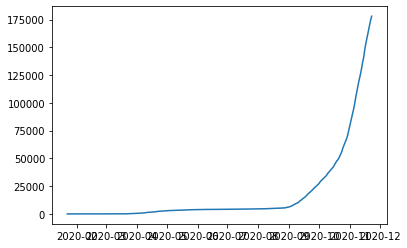

In [ ]:
plt.plot(daily_hu)

Kiszámoljuk a napi esetszámot, mivel egy összegzett esetszám adott.

In [ ]:
daily_hu = daily_hu.diff().fillna(daily_hu[0]).astype(np.int64)
daily_hu.head()

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
dtype: int64

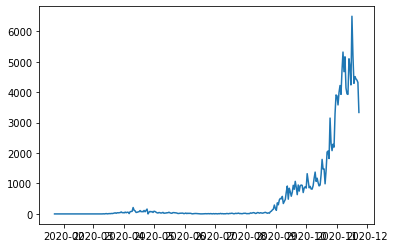

In [ ]:
plt.plot(daily_hu)

Eldobjuk a 0 értékeket az adatból.

In [ ]:
daily = daily_hu.loc[~(daily_hu==0)]

In [ ]:
print(daily)

2020-03-04       2
2020-03-07       2
2020-03-08       3
2020-03-09       2
2020-03-11       4
              ... 
2020-11-19    4512
2020-11-20    4440
2020-11-21    4397
2020-11-22    4320
2020-11-23    3334
Length: 260, dtype: int64


Lefuttatjuk az ARIMA becslést.

In [ ]:
model = pm.auto_arima(daily)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model.fit(daily)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

Kiírjuk a modell paramétereit.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:               SARIMAX(0, 1, 4)   Log Likelihood               -1805.921
Date:                Tue, 24 Nov 2020   AIC                           3623.842
Time:                        07:28:12   BIC                           3645.183
Sample:                             0   HQIC                          3632.423
                                - 260                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.8584     11.585      1.283      0.200      -7.849      37.565
ma.L1         -0.3099      0.036     -8.624      0.000      -0.380      -0.239
ma.L2         -0.1743      0.038     -4.563      0.000      -0.249      -0.099
ma.L3          0.2475      0.025      9.845      0.000       0.198       0.297
ma.L4         -0.1998      0.029     -6.877      0.000      -0.257      -0.143
sigma2      6.716e+04   2424.879     27.695      0.000    6.24e+04    7.19e+04
===================================================================================
Ljung-Box (Q):                      145.31   Jarque-Bera (JB):              2577.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             149.28   Skew:                             1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A következő 7 napra becslést végzünk.

In [ ]:
output = model.predict(n_periods = 7)

In [ ]:
print(output)

[3699.54885422 3911.30234452 3652.2989187  3903.71698781 3918.57540302
 3933.43381824 3948.29223345]


In [ ]:
predicted = pm.c(daily, output)

Kirajzoljuk az eredményeket.

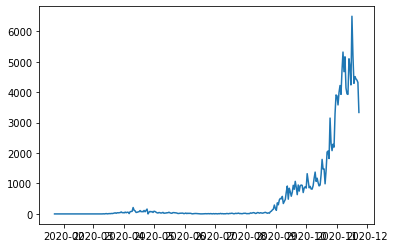

In [ ]:
plt.plot(daily_hu)

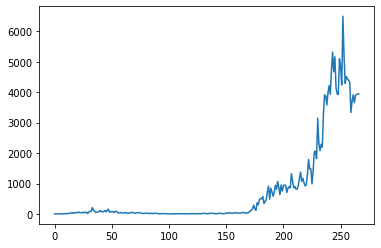

In [ ]:
plt.plot(predicted)